# Pandas Dataframes & MatPlotLib
### Dr. Antonio Arista Jalife

Pandas utiliza una estructura llamada "DataFrame" para manejar sus datos, de tal manera que es importante que nos familiaricemos con la estructura de ellos. 

#### Importamos Pandas a nuestro notebook:

In [ ]:
import pandas as pd

#### Cargamos el Dataset y lo desplegamos:

In [ ]:
dataframe = pd.read_csv('CrimeReports.csv')

dataframe

Si nosotros queremos las primeras 10 líneas podemos utilizar el comando .head(10), o el comando .tail(10) si queremos las últimas 10.

In [ ]:
dataframe.head(10)

In [ ]:
dataframe.tail(10)

No todas las columnas en un dataframe son útiles, por lo que nosotros podemos elegir las columnas y el orden de la siguiente manera:
dataframe[['nombre columna 1', 'nombre columna 2',...]]

In [ ]:
dataframe[['address','latitude','longitude', 'ucr_ncic_code']]

Ahora, donde viene lo interesante: Seleccionar las filas dependiendo de lo que requerimos. 
los códigos NCIC de este dataset (ucr_ncic_code) son los códigos de crimenes cometidos en estados unidos. Si somos un data scientist de la policia, necesitamos la descricpión del crimen (crimedescr) y el código.

In [ ]:
dataframe[['ucr_ncic_code', 'crimedescr']]

Parece ser que los incidentes con arma de fuego son el código 7000, por lo que necesitamos solamente las filas con el código 7000

In [ ]:
#De toda la base de datos, seleccionamos solo dos columnas:
AllCodes = dataframe[['ucr_ncic_code', 'crimedescr']]
#Y de esas dos columnas, seleccionamos solo aquellas que tengan el código 7000 en ucr:
Code7000 = AllCodes[AllCodes['ucr_ncic_code'] == 7000]
#Y mostramos...
Code7000

Que pasa si necesitamos también los crimenes cuya descripción tiene 'weapon' en su string? Con esto podemos hacer una condicional doble: recuerda que & significa 'and', y | significa 'or'

In [ ]:
#De toda la base de datos, seleccionamos solo dos columnas:
AllCodes = dataframe[['ucr_ncic_code', 'crimedescr']]
#Y de esas dos columnas, seleccionamos solo aquellas que tengan el código 7000 y que contengan la palabra 'WEAPON':
Code7000 = AllCodes[(AllCodes['ucr_ncic_code'] == 7000) & (AllCodes['crimedescr'].str.contains('WEAPON'))]
#Y mostramos...
Code7000

la función 'describe' te da datos de tu dataframe que pueden serte útiles.

In [ ]:
Code7000.describe

Y la función count nos dice cuantos datos hay en cada columna. Toma en cuenta que pueden haber datos en None (null) por lo que los datos no pueden ser iguales ;) 

In [ ]:
#Cuantos asaltos con arma?
Code7000.count()

Veamos nuevamente como está el dataframe... las primeras tres filas:

In [ ]:
dataframe.head(3)

Vaya, hay latitud y longitud, los cuales son datos de punto flotante. Podemos sacar la media o promedio con la función 'mean': y esos datos pueden sernos útiles para mappear el punto central del crimen

In [ ]:
print("Latitud promedio: "+str(dataframe['latitude'].mean()))
print("Longitud promedio: "+str(dataframe['longitude'].mean()))

Por cierto! puedes obtener un dato específico con iloc[indice], sin embargo no creo que lo uses mucho como data scientist...

In [ ]:
dataframe.iloc[4]

### Añadiendo datos con Dataframes.
Comencemos de nuevo, y esta vez agregando una función de semiverseno (o haversine). Con el siguiente código puedes:
1. obtener la latitud y longitud como listas de python
2. obtener la latitud y longitud promedio
3. calcular las distancias entre el centro y la latitud/longitud, iterando por toda la lista de latitudes y longitudes.
4. añadir la lista de distancias como serie al dataframe.

In [4]:
import pandas as pd
import Semiverseno as semiv

dataframe = pd.read_csv('CrimeReports.csv')

ListaLatitudes = dataframe['latitude'].tolist()
ListaLongitudes = dataframe['longitude'].tolist()

LatitudPromedio = dataframe['latitude'].mean()
LongitudPromedio = dataframe['longitude'].mean()

Distancias = []
for contador in range(0,len(ListaLatitudes)):
    dist = semiv.ObtenerDistancia(LatitudPromedio, LongitudPromedio, ListaLatitudes[contador], ListaLongitudes[contador])
    Distancias.append(dist)
    

distanciasSeries = pd.Series(Distancias, name='Distancia')

dataframe = dataframe.join(distanciasSeries)

dataframe

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude,Distancia
0,1/1/06 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416,6.382934
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186,9.867137
2,1/1/06 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101,10.902235
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951,6.713329
4,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613,11.041931
5,1/1/06 0:00,5301 BONNIEMAE WAY,6,6B,1084,530.5 PC USE PERSONAL ID INFO,2604,38.526979,-121.451338,3.808848
6,1/1/06 0:00,2217 16TH AVE,4,4A,957,459 PC BURGLARY VEHICLE,2299,38.537173,-121.487577,3.255685
7,1/1/06 0:00,3547 P ST,3,3C,853,484 PC PETTY THEFT/INSIDE,2308,38.564335,-121.461883,0.530996
8,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY BUSINESS,2203,38.637448,-121.384613,11.041931
9,1/1/06 0:00,1326 HELMSMAN WAY,1,1B,444,1708 US THEFT OF MAIL,2310,38.609602,-121.491838,6.048224


## MatPlotLib:

Matplotlib tiene muchas funciones que te permiten graficar tus resultados en forma de listas. Veamos ejemplos:
Este es un snippet que te deja graficar polígonos:

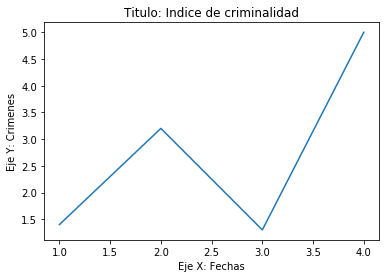

In [8]:
import matplotlib.pyplot as plt

x= [1,2,3,4]
y= [1.4, 3.2, 1.3, 5.0]
plt.plot(x,y)

plt.title("Titulo: Indice de criminalidad")
plt.xlabel("Eje X: Fechas")
plt.ylabel("Eje Y: Crimenes")
plt.show()

Puedes graficar también en forma de barras. El eje X puede ser texto si lo necesitas.

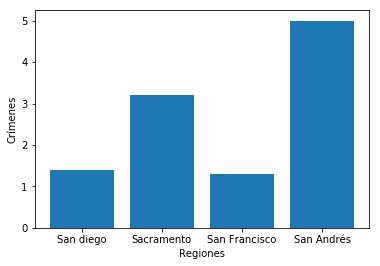

In [11]:
x= ['San diego', 'Sacramento', 'San Francisco', 'San Andrés']
plt.xlabel("Regiones")
plt.ylabel("Crímenes")
plt.bar(x,y)
plt.show()

Y también puedes graficar datos en una lista solamente, como un pie.
El pie recibe datos, pero los grafica con porcentajes: Los datos no necesariamente tienen que sumar 100%, sino que los toma y los grafica conforme lo requiere.

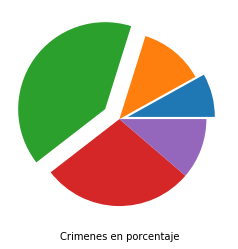

In [18]:
DatosPie = [10, 15, 50, 35, 14]
resaltado = [0.1, 0, 0.2, 0, 0]
plt.pie(DatosPie, explode = resaltado)
plt.xlabel("Crimenes en porcentaje")
plt.show()